# Hi and welcome to my project on the analysis of the National Service Subreddit 

## Being an NSF who is currently fulfilling my NS duties, I am eager to gain a better understanding of the experiences and viewpoints of my fellow servicemen. Through this project, I aspire to increase awareness about their circumstances.


## Lets get this project started!

### Lets install all the necessary libraries

In [435]:
!pip install praw
!pip install pmaw
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install nltk
!pip install squarify
!pip install xgboost



### Lets import them in 

In [426]:
import praw
import pmaw
from pmaw import PushshiftAPI
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from math import ceil
from sklearn.feature_extraction.text import CountVectorizer
import squarify
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


*Dont worry about the credentials, its for a dummy account I created for this project. I cant possibly be giving you my actual credentials right:)*

In [164]:
credentials={
    'client_id':"ZTNhOnD5GJJIuLoS0gL_ag",
    'client_secret':"v0cQ0foQLx3tqFymGg_bS2R8vBTy0A",
    'user_agent':"National Service",
    'username':"Own-Performance1801",
    'password':"Password12345"
}

In [165]:
reddit = praw.Reddit(
    client_id=credentials['client_id'],
    client_secret=credentials['client_secret'],
    password=credentials['password'],
    user_agent=credentials['user_agent'],
    username=credentials['username'],
)

Lets extract the most recent 1000 posts

In [166]:
api = PushshiftAPI()
posts = api.search_submissions(praw=reddit,subreddit="NationalServiceSG", limit=1000)
post_list = [post for post in posts]
print("Done")

Done


In [167]:
df=pd.DataFrame(post_list)

In [168]:
df.shape

(1000, 98)

In [169]:
df.head()

,all_awardings,allow_live_comments,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,utc_datetime_str,post_hint,preview,edited_on,call_to_action,poll_data,url_overridden_by_dest,author_cakeday,crosspost_parent,crosspost_parent_list
0,[],False,False,Scissors_Salad01,1.599068e+09,None,None,[],None,None,...,2022-05-15 01:44:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,False,[deleted],NaN,,None,NaN,None,None,...,2022-05-15 01:10:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",False,False,Juggernaut102,1.534584e+09,None,None,[],None,None,...,2022-05-15 00:55:23,self,"{'enabled': False, 'images': [{'id': 'ZcSK2HqJ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,False,[deleted],NaN,,None,NaN,None,None,...,2022-05-15 00:53:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,False,WuTangWhoNow,1.652541e+09,None,None,[],None,None,...,2022-05-14 15:29:38,NaN,NaN,1.652543e+09,NaN,NaN,NaN,NaN,NaN,NaN


**Clearly there are many attributes here and we do not need all of them so lets clean up the dataset and pick out the features we want**

In [170]:
df.columns

Index(['all_awardings', 'allow_live_comments', 'archived', 'author',
       'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_gild',
       'category', 'content_categories', 'contest_mode', 'created_utc',
       'discussion_type', 'distinguished', 'domain', 'edited', 'gilded',
       'gildings', 'hidden', 'hide_score', 'id', 'is_created_from_ads_ui',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_only', 'no_fo

In [171]:
selected_features=['author','num_comments','pinned','score','title','total_awards_received','upvote_ratio','utc_datetime_str']
df_2=df[selected_features]

*Lets take a look at our new dataset*

In [172]:
df_2.head()

,author,num_comments,pinned,score,title,total_awards_received,upvote_ratio,utc_datetime_str
0,Scissors_Salad01,17,False,14,"Spf vocation SOC or GRF, which is better ?",0,0.89,2022-05-15 01:44:58
1,[deleted],1,False,3,Air Force Compass Test Attendance,0,0.71,2022-05-15 01:10:09
2,Juggernaut102,7,False,45,Guide for enlisting PNSFs (2022),1,0.96,2022-05-15 00:55:23
3,[deleted],0,False,1,Posted as SA to sungei gedong,0,1.00,2022-05-15 00:53:21
4,WuTangWhoNow,6,False,35,"US, AUS/NZ, INDO, THAI, etc forces at SAFTI?",0,0.95,2022-05-14 15:29:38


In [173]:
df_2.describe()

,num_comments,score,total_awards_received,upvote_ratio
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.052000,10.225000,0.022000,0.887600
std,10.558351,31.672157,0.309211,0.185821
min,0.000000,0.000000,0.000000,0.170000
25%,0.000000,1.000000,0.000000,0.840000
50%,0.000000,1.000000,0.000000,1.000000
75%,5.250000,5.000000,0.000000,1.000000
max,99.000000,558.000000,7.000000,1.000000


In [174]:
df_2.isnull().sum()

author                   0
num_comments             0
pinned                   0
score                    0
title                    0
total_awards_received    0
upvote_ratio             0
utc_datetime_str         0
dtype: int64

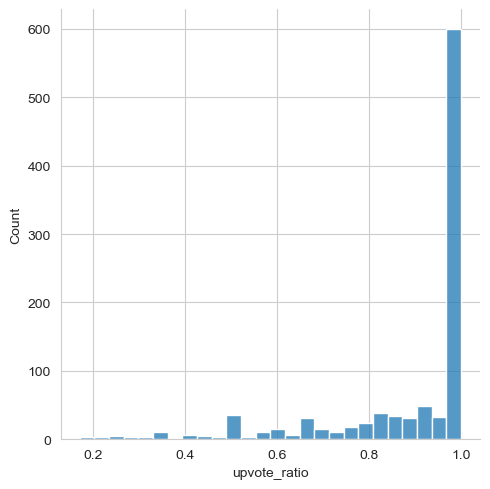

In [353]:
sns.displot(data=df_2, x="upvote_ratio")
plt.show()

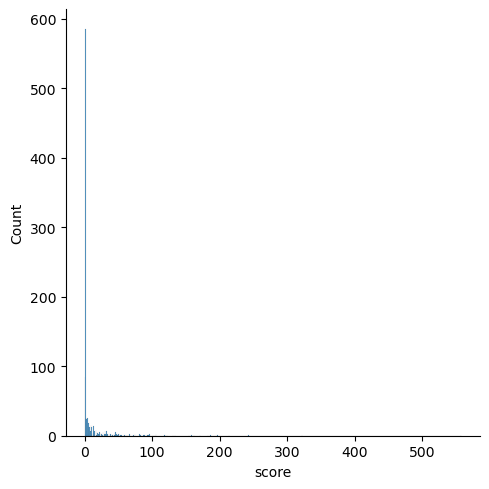

In [176]:
sns.displot(data=df_2, x="score")
plt.show()

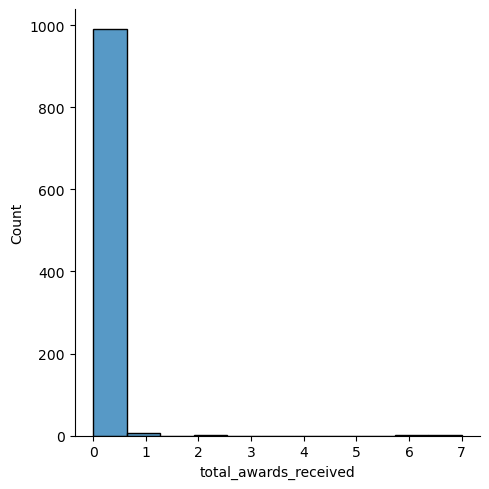

In [177]:
sns.displot(data=df_2, x="total_awards_received")
plt.show()

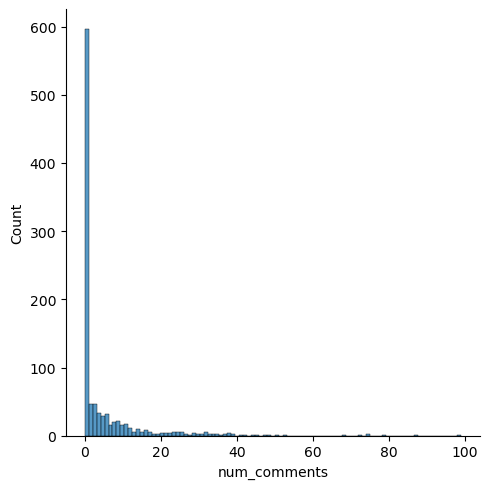

In [178]:
sns.displot(data=df_2, x="num_comments")
plt.show()

In [179]:
df_2.dtypes

author                    object
num_comments               int64
pinned                      bool
score                      int64
title                     object
total_awards_received      int64
upvote_ratio             float64
utc_datetime_str          object
dtype: object

In [436]:
df_2["utc_datetime_str"] = pd.to_datetime(df_2["utc_datetime_str"])

In [437]:
df_2['date']=df_2['utc_datetime_str'].apply(lambda x:x.date())
df_2['year']=df_2['utc_datetime_str'].apply(lambda x:x.year)
df_2['month']=df_2['utc_datetime_str'].apply(lambda x:x.month)
df_2['day']=df_2['utc_datetime_str'].apply(lambda x:x.day)
df_2['week']=df_2['utc_datetime_str'].apply(lambda x:x.week)
df_2['weekday']=df_2['utc_datetime_str'].apply(lambda x:x.weekday())

In [184]:
df_2.head()

,author,num_comments,pinned,score,title,total_awards_received,upvote_ratio,utc_datetime_str,date,year,month,day,week,weekday
0,Scissors_Salad01,17,False,14,"Spf vocation SOC or GRF, which is better ?",0,0.89,2022-05-15 01:44:58,2022-05-15,2022,5,15,19,6
1,[deleted],1,False,3,Air Force Compass Test Attendance,0,0.71,2022-05-15 01:10:09,2022-05-15,2022,5,15,19,6
2,Juggernaut102,7,False,45,Guide for enlisting PNSFs (2022),1,0.96,2022-05-15 00:55:23,2022-05-15,2022,5,15,19,6
3,[deleted],0,False,1,Posted as SA to sungei gedong,0,1.00,2022-05-15 00:53:21,2022-05-15,2022,5,15,19,6
4,WuTangWhoNow,6,False,35,"US, AUS/NZ, INDO, THAI, etc forces at SAFTI?",0,0.95,2022-05-14 15:29:38,2022-05-14,2022,5,14,19,5


In [185]:
df_2=df_2.rename(columns={"utc_datetime_str": "datetime"})

Lets first use the Sentiment Intensity Analyser to generate a sentiment score for each post

In [438]:
nltk.download(['stopwords'])
nltk.download('vader_lexicon')

In [187]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_score(row):
    title=str(row[4])
    tokens=word_tokenize(title)
    #print(tokens)
    eng_stopwords =stopwords.words("english")
    tokens=[token for token in tokens if token.isalpha()]
    #print(tokens)
    tokens=[token for token in tokens if token not in eng_stopwords]
    #print(tokens)
    string=f"{' '.join(tokens)}"
    #print(type(string))
    score=sia.polarity_scores(string)['compound']
    return score

In [188]:
df_2['sentiment_score']=df_2.apply(get_sentiment_score,axis=1)

In [189]:
df_2['quarter']=df_2['month'].apply(lambda x:ceil(x/3))

**Now that we have our sentiment score, lets try to extract trends from our data** 

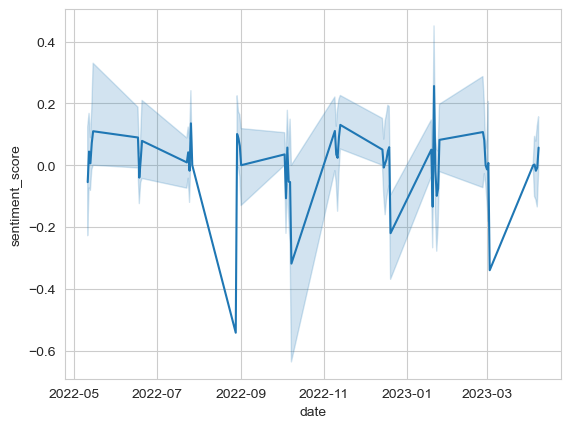

In [257]:
sns.lineplot(data=df_2,x='date',y='sentiment_score')
plt.show()

We can observe that the sentiment level stays fairly consistent with intermittent fluctuations. Nonetheless, there are prolonged periods of either elevated or reduced sentiment, which may be attributed to specific events. Therefore, let's investigate the reasons behind such occurrences.

Lets focus on the month of august of 2022 where sentiments were consistently much lower then usual

In [247]:
df_2['month'].value_counts()

5     100
7     100
10    100
11    100
12    100
4     100
1     100
6     100
8      77
2      59
3      41
9      23
Name: month, dtype: int64

In [272]:
df_3=df_2.loc[df_2['month']==8]
print(df_3['date'].value_counts())
df_4=df_3.groupby(by='date').mean()
df_4

2022-08-31    27
2022-08-29    27
2022-08-30    22
2022-08-28     1
Name: date, dtype: int64


,num_comments,pinned,score,total_awards_received,upvote_ratio,year,month,day,week,weekday,sentiment_score,quarter
date,,,,,,,,,,,,
2022-08-28,7.000000,0.0,0.000000,0.000000,0.330000,2022.0,8.0,28.0,34.0,6.0,-0.542300,3.0
2022-08-29,15.629630,0.0,24.333333,0.000000,0.792222,2022.0,8.0,29.0,35.0,0.0,0.101096,3.0
2022-08-30,8.545455,0.0,15.318182,0.045455,0.802273,2022.0,8.0,30.0,35.0,1.0,0.087150,3.0
2022-08-31,5.666667,0.0,20.296296,0.000000,0.839630,2022.0,8.0,31.0,35.0,2.0,0.062385,3.0


Considering that this data was presented in the form of a line graph, it's worth noting that the last point in July had to connect with the first point in August, creating an uninterrupted line. However, the line graph may be **misleading** due to the lack of posts recorded for most of August, which seems improbable and could be due to an API error. Additionally, the highly negative sentiment expressed in the first post of August may not accurately reflect the overall sentiment of that period, **creating a false perception of persistent negative sentiment**.To further clarify, it's important to note that the remaining posts in August had a normal sentiment and were not consistently negative. Therefore, the highly negative sentiment expressed in the first post of August was not representative of the overall sentiment during that time period.

Lets try using using sentiment score per month. It  could be a more accurate approach as it can avoid the mistake that we previously saw in our line graph

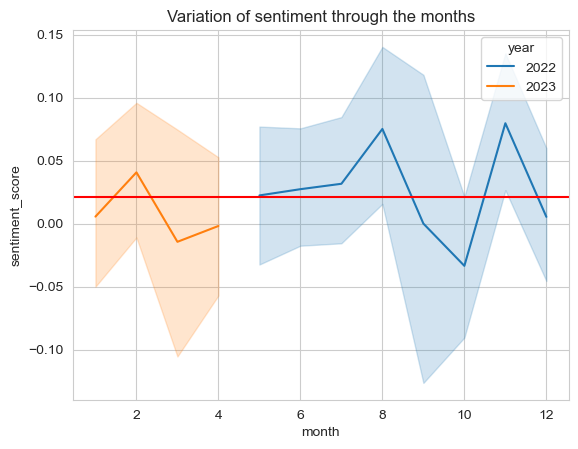

In [290]:
ax=sns.lineplot(data=df_2,x='month',y='sentiment_score',hue='year',palette='tab10')
ax.set_title('Variation of sentiment through the months')
ax.axhline(df_2['sentiment_score'].mean(),color='r')
plt.show()

We can observe that the sentiment score per month generally fluctuates around the red line, which represents the mean score. However, there are some significant fluctuations that warrant further investigation. To understand the October sentiment score drop, we must analyze post language for common themes to identify negative factors and uncover underlying issues.

In [291]:
df_5=df_2.loc[df_2['month']==10]

In [296]:
#for a more detailed explanation as to what I am doing, scroll down to the next section on 
#using the title of the post to find out what are the main issues that NSFs discuss about
vectorizer_2=CountVectorizer(vocabulary=vectorizer.vocabulary_)
title_bow_2=vectorizer_2.fit_transform(df_5['title_improved']).toarray()
final_array_2=np.zeros(100)
for title in title_bow_2:
    arr=np.array(title)
    final_array_2 = np.add(final_array_2, arr) 
vocab_count_2={}
for key in vectorizer_2.vocabulary_.keys():
    index=vectorizer_2.vocabulary_[key]
    vocab_count_2[key]=final_array_2[index]
sorted_vocab_count_2 = sorted(vocab_count_2.items(), key=lambda x:x[1],reverse=True)

In [299]:
index_2=[0,2,3,6,8,9,14,16,17,18,19,20,22,23,32,34,35,46,50,51,52,53,55,59,63,68,70,73,75]
filtered_vocab_count_2=[]
for inde in index_2:
    filtered_vocab_count_2.append(sorted_vocab_count_2[inde])

In [300]:
words_2=pd.DataFrame(filtered_vocab_count_2,columns=['Word','Frequency'])

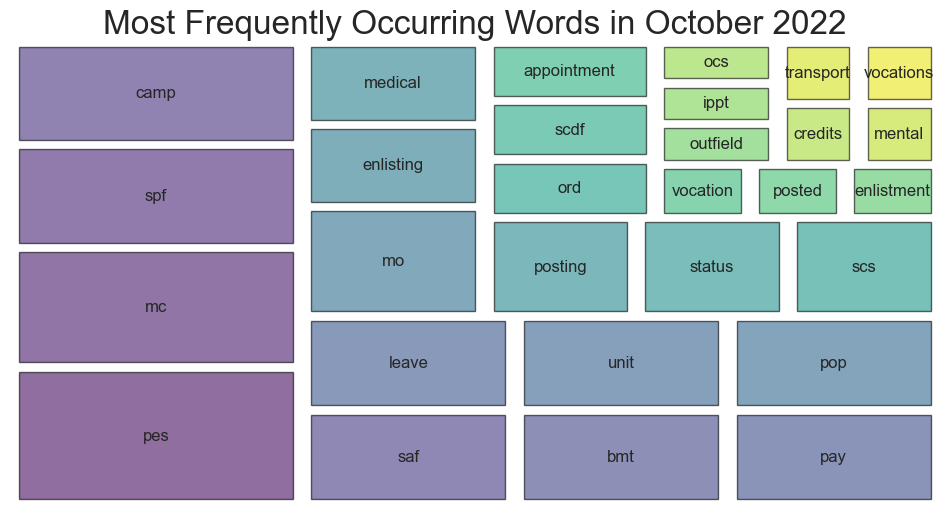

In [304]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes_2= words_2["Frequency"].values# proportions of the categories
label_2=words_2["Word"]
plt.figure(figsize=(12, 6))
axis=squarify.plot(sizes=sizes_2, label=label_2,ec='black',text_kwargs={'fontsize': 12}, alpha=0.6,pad=2,color=sns.color_palette("viridis", 
                                     len(sizes_2)))
plt.axis('off')
axis.set_title("Most Frequently Occurring Words in October 2022", fontsize=24)
plt.show()

As we can see, when comparing this treemap for the month of october and the treemap below for the entire timeframe of the entire 1000 posts, the distribution of frequency of the words is different.
We can see that the proportions of words with a lower sentiment score increase, leading to the October sentiment score drop

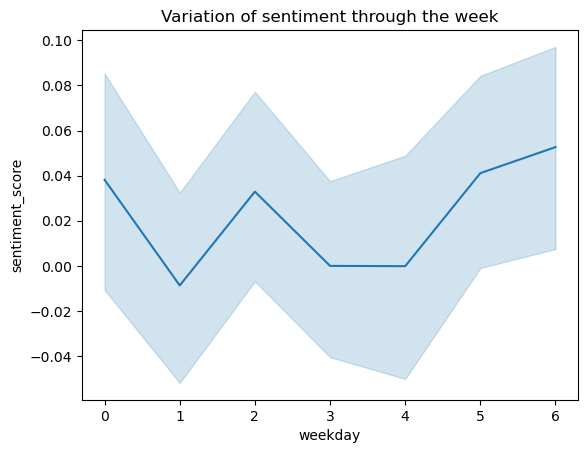

In [194]:
ax=sns.lineplot(data=df_2,x='weekday',y='sentiment_score')
ax.set_title('Variation of sentiment through the week')
plt.show()

It is apparent that the sentiment level tends to be higher on days 5 and 6, which are the weekends. This correlation makes sense since NSFs are permitted to book out on Fridays so they are allowed to spend the weekends outside camp instead of in the camp, which may contribute to their increased happiness.
<br>
Hence, a viable solution to boost the morale of NSFs could be to increase the duration of time spent outside of camp or permit them to book out earlier. Presently, the decision on such matters is primarily at the discretion of superiors. Implementing regulations to restrict the number of days an NSF is required to spend in camp or how late a superior can detain them could be beneficial. This would ensure that the well-being of NSFs is given due consideration and not subject to the arbitrary decisions of superiors.

## Now lets use the title of the post to find out what are the main issues that  NSFs discuss about

In [201]:
vectorizer=CountVectorizer(max_features=100)

In [202]:
def title_improved(row):
    title=str(row[4])
    tokens=word_tokenize(title)
    #print(tokens)
    eng_stopwords =stopwords.words("english")
    tokens=[token for token in tokens if token.isalpha()]
    #print(tokens)
    tokens=[token for token in tokens if token not in eng_stopwords]
    #print(tokens)
    string=f"{' '.join(tokens)}"
    #print(type(string))
    #score=sia.polarity_scores(string)['compound']
    return string

In [203]:
df_2['title_improved']=df_2.apply(title_improved,axis=1)

In [204]:
title_bow=vectorizer.fit_transform(df_2['title_improved']).toarray()

In [208]:
final_array=np.zeros(100)
for title in title_bow:
    arr=np.array(title)
    final_array = np.add(final_array, arr) 

In [211]:
vectorizer.vocabulary_.keys()

dict_keys(['spf', 'vocation', 'enlisting', 'posted', 'ns', 'curious', 'pes', 'saf', 'medical', 'posting', 'bmt', 'may', 'tekong', 'advice', 'anyone', 'day', 'question', 'enlistment', 'ord', 'would', 'go', 'downpes', 'need', 'help', 'outfield', 'experience', 'does', 'best', 'get', 'like', 'how', 'long', 'will', 'still', 'getting', 'pay', 'regarding', 'date', 'ippt', 'is', 'possible', 'work', 'do', 'questions', 'life', 'next', 'week', 'ocs', 'pro', 'term', 'hq', 'why', 'nsfs', 'excuse', 'going', 'what', 'leave', 'sign', 'nsf', 'amp', 'stay', 'want', 'unit', 'got', 'expect', 'first', 'camp', 'signing', 'reservist', 'pop', 'time', 'book', 'people', 'to', 'status', 'army', 'know', 'can', 'credits', 'guys', 'course', 'overseas', 'mental', 'health', 'year', 'bring', 'due', 'scdf', 'singapore', 'mc', 'transport', 'national', 'service', 'interview', 'find', 'appointment', 'my', 'vocations', 'scs', 'mo'])

In [212]:
vocab_count={}
for key in vectorizer.vocabulary_.keys():
    index=vectorizer.vocabulary_[key]
    vocab_count[key]=final_array[index]

In [215]:
sorted_vocab_count = sorted(vocab_count.items(), key=lambda x:x[1],reverse=True)

### Lets filter out the relevant keywords

In [234]:
index=[0,5,7,13,14,15,17,18,20,21,25,29,30,38,39,42,43,45,46,47,53,55,56,57,58,60,62,64,65,66,71,79,85,87,88]
filtered_vocab_count=[]
for inde in index:
    filtered_vocab_count.append(sorted_vocab_count[inde])

## Analyzing the most frequent words, we can identify certain topics that seem to cause confusion or concern among the users.

In [235]:
words=pd.DataFrame(filtered_vocab_count,columns=['Word','Frequency'])
words.head()

,Word,Frequency
0,pes,106.0
1,bmt,42.0
2,enlistment,38.0
3,camp,30.0
4,ord,29.0


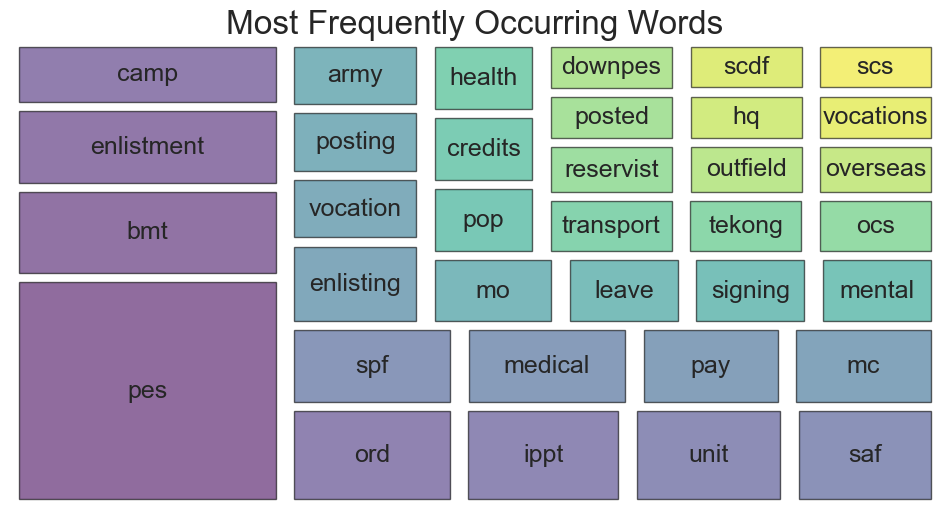

In [280]:
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= words["Frequency"].values# proportions of the categories
label=words["Word"]
plt.figure(figsize=(12, 6))
axis=squarify.plot(sizes=sizes, label=label,ec='black',text_kwargs={'fontsize': 18}, alpha=0.6,pad=2,color=sns.color_palette("viridis", 
                                     len(sizes)))
plt.axis('off')
axis.set_title("Most Frequently Occurring Words", fontsize=24)
plt.show()

# Now lets try to train a model which can accurately predict the sentiment score 

In [305]:
#right now df_2 is the dataframe we are going to get our data from so lets make a copy of it 

df_6=df_2.copy(deep=True)
vectorizer_3=CountVectorizer(vocabulary=vectorizer.vocabulary_)
title_bow_3=vectorizer_3.fit_transform(df_6['title_improved']).toarray()
df_6.dtypes

author                           object
num_comments                      int64
pinned                             bool
score                             int64
title                            object
total_awards_received             int64
upvote_ratio                    float64
datetime                 datetime64[ns]
date                             object
year                              int64
month                             int64
day                               int64
week                              int64
weekday                           int64
sentiment_score                 float64
quarter                           int64
title_improved                   object
dtype: object

In [307]:
df_6=df_6.merge(pd.DataFrame(title_bow_3),left_index=True,right_index=True)
df_6=df_6.drop(columns=['author','pinned','title','title_improved','datetime','date'])

In [308]:
df_6.dtypes

num_comments               int64
score                      int64
total_awards_received      int64
upvote_ratio             float64
year                       int64
                          ...   
95                         int64
96                         int64
97                         int64
98                         int64
99                         int64
Length: 111, dtype: object

In [309]:
df_6.head()

,num_comments,score,total_awards_received,upvote_ratio,year,month,day,week,weekday,sentiment_score,...,90,91,92,93,94,95,96,97,98,99
0,17,14,0,0.89,2022,5,15,19,6,0.4404,...,1,0,0,0,0,0,0,0,0,0
1,1,3,0,0.71,2022,5,15,19,6,0.0000,...,0,0,0,0,0,0,0,0,0,0
2,7,45,1,0.96,2022,5,15,19,6,0.0000,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1.00,2022,5,15,19,6,0.0000,...,0,0,0,0,0,0,0,0,0,0
4,6,35,0,0.95,2022,5,14,19,5,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [338]:
df_6.head()

,num_comments,score,total_awards_received,upvote_ratio,year,month,day,week,weekday,quarter,...,90,91,92,93,94,95,96,97,98,99
0,17,14,0,0.89,2022,5,15,19,6,2,...,1,0,0,0,0,0,0,0,0,0
1,1,3,0,0.71,2022,5,15,19,6,2,...,0,0,0,0,0,0,0,0,0,0
2,7,45,1,0.96,2022,5,15,19,6,2,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1.00,2022,5,15,19,6,2,...,0,0,0,0,0,0,0,0,0,0
4,6,35,0,0.95,2022,5,14,19,5,2,...,0,0,0,0,0,0,0,0,0,0


In [310]:
target=df_6.pop('sentiment_score')

In [312]:
X_train, X_test, y_train, y_test = train_test_split(df_6, target, test_size=0.33, random_state=42)

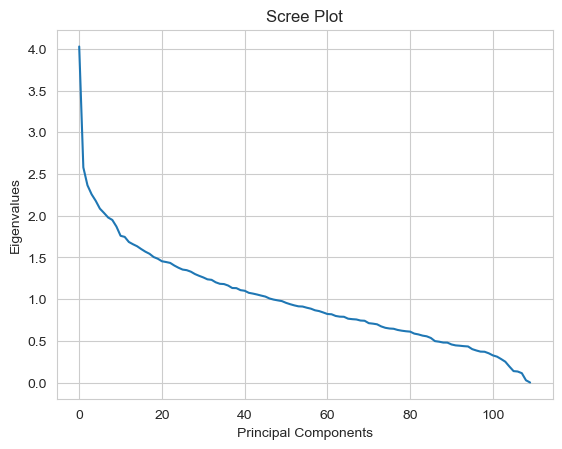

In [354]:
#Standardize the data by subtracting the mean and dividing by the standard deviation
X = (X_train - X_train.mean()) / X_train.std()
#Compute the covariance matrix of the standardized data
cov_matrix = np.cov(X.T)
#Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
#Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
#Plot the sorted eigenvalues against their corresponding principal components
plt.plot(sorted_eigenvalues)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()

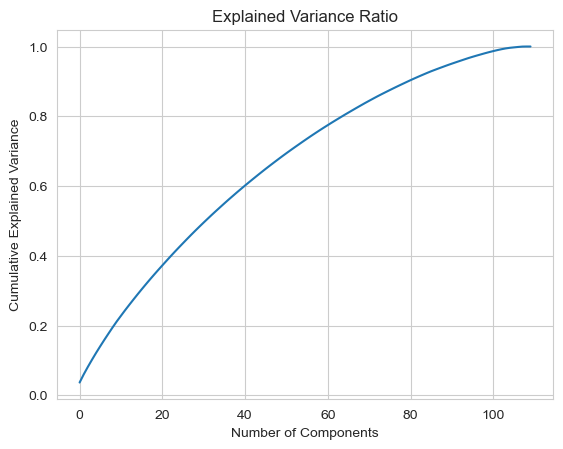

In [356]:
#Fit the PCA model to your data
pca = PCA().fit(X)
#Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

Using *Kaiser's rule*, we keep **50 PC** which accounts for about **70% of the variance**

In [357]:
X_train_2 = (X_train - X_train.mean()) / X_train.std()
pca = PCA(n_components=50)
principal_components = pca.fit_transform(X_train_2)
X_train_2 = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i+1) for i in range(50)])
X_test_2 = (X_test - X_test.mean()) / X_test.std()
val_principal_components = pca.transform(X_test_2)
X_test_2 = pd.DataFrame(data=val_principal_components, columns=['PC{}'.format(i+1) for i in range(50)])


Lets try out 5 different regression models and see which performs the best

In [395]:
#First up is linear regression
model = LinearRegression()
model.fit(X_train_2, y_train)
scores=cross_val_score(model, X_train_2, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(scores.mean()*-1)
print(scores.std())

0.25446217575679086
0.021289789422711362


In [398]:
#Next is Polynomial regression
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_2)

# Create a Polynomial Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, y_train)

scores=cross_val_score(model, X_train_2, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(scores.mean()*-1)
print(scores.std())

0.25446217575679086
0.021289789422711362


In [419]:
#Next is Ridge Regression
model = Ridge(alpha=1.0)

model.fit(X_train_2, y_train)
scores=cross_val_score(model, X_train_2, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(scores.mean()*-1)
print(scores.std())

0.25443049240152604
0.02129201265285394


In [422]:
#Next is ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=0.0001, random_state=42)
model.fit(X_train_2, y_train)
scores=cross_val_score(model, X_train_2, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(scores.mean()*-1)
print(scores.std())

0.26927296456361455
0.018410282704078088


In [423]:
#Next is Random Forest Regressor

model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1, random_state=42)
model.fit(X_train_2, y_train)
scores=cross_val_score(model, X_train_2, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(scores.mean()*-1)
print(scores.std())

0.24979311616892455
0.01894615895869283


In [427]:
#Next is Gradient Boosting Regressor

model = GradientBoostingRegressor(n_estimators=500, max_depth=5, learning_rate=0.1)
model.fit(X_train_2, y_train)
scores=cross_val_score(model, X_train_2, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(scores.mean()*-1)
print(scores.std())

0.26300402713274285
0.024798264854043427


In [428]:
#Next is AdaBoost Regressor
tree_reg = DecisionTreeRegressor(max_depth=5)
model = AdaBoostRegressor(base_estimator=tree_reg, n_estimators=500, learning_rate=0.1)
model.fit(X_train_2, y_train)
scores=cross_val_score(model, X_train_2, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(scores.mean()*-1)
print(scores.std())

0.2601532794295197
0.019869826942379747


### Looks like ElasticNet does the best, lets find the best parameters for it using grid search

In [430]:
# define the model
model = ElasticNet()

# define the parameter grid to search
param_grid = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [1000, 5000, 10000]
}

# define the grid search object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    verbose=5
)

# fit the grid search object to the training data
grid_search.fit(X_train_2, y_train)

# print the best hyperparameters found
print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': False}


### Great, we have found the optimum hyper parameters. Lets put it into our model and observe our new score

In [431]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=True, normalize=False, max_iter=1000)
model.fit(X_train_2, y_train)
scores=cross_val_score(model, X_train_2, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(scores.mean()*-1)
print(scores.std())

0.2525813335234425
0.021723991615750927


After applying the hyperparameters from the grid search, the cross-validation score unexpectedly decreased. This could be due to overfitting or the relatively small sample size of our dataset. However, we can still use the original hyperparameters for the Elastic Net model, which had performed the best during our testing phase.

# The project is successfully completed! Through the project, data analysis was conducted on the dataset to extract trends, which allowed for the proposal of measures to improve the welfare of NSFs. Additionally, an optimum machine learning model was trained to predict the sentiment score. It was an interesting and informative journey, and valuable knowledge was gained throughout the process. Overall, it was an enjoyable experience, and I am excited to start my next project!